In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '1989-01-01'
end = '2023-12-31'

stock = 'MSFT'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1989-01-03,0.371528,0.373264,0.366319,0.372396,0.230031,51825600
1,1989-01-04,0.371528,0.381076,0.371528,0.376736,0.232712,53899200
2,1989-01-05,0.380208,0.380208,0.369792,0.370660,0.228959,47246400
3,1989-01-06,0.371528,0.373264,0.368056,0.368056,0.227350,59054400
4,1989-01-09,0.368056,0.369792,0.361979,0.364583,0.225205,46008000
...,...,...,...,...,...,...,...
8812,2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215424,17091100
8813,2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
8814,2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400
8815,2023-12-28,375.369995,376.459991,374.160004,375.279999,373.912842,14327000


In [5]:
mva_days=data.Close.rolling(200).mean()
win_size=10
arr1=np.array(mva_days)

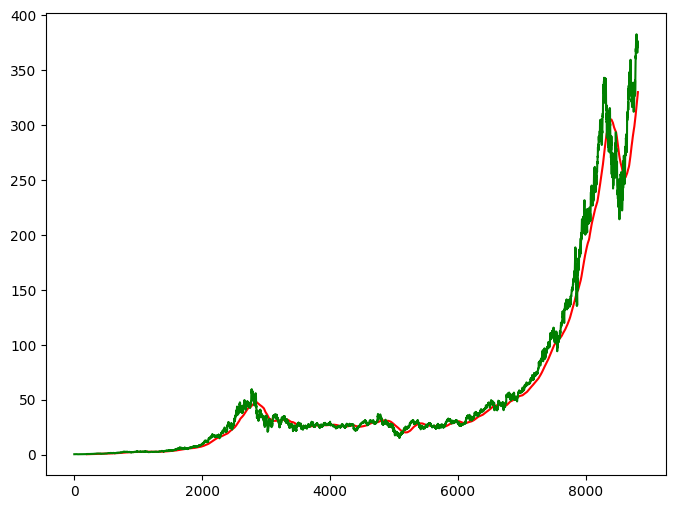

In [6]:
plt.figure(figsize=(8,6))
plt.plot(mva_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
mva_days.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(mva_days[0: int(len(mva_days)*0.80)])
data_test = pd.DataFrame(mva_days[int(len(mva_days)*0.80): len(mva_days)])

In [9]:
data_train.shape[0]

6894

In [10]:
data_test.shape[0]

1724

In [11]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms(feature_range=(0,1))


In [12]:
data_train_scale=scaler.fit_transform(data_train)

In [13]:
x=[]
y=[]

for i in range (win_size,data_train_scale.shape[0]):
    x.append(data_train_scale[i-win_size:i])
    y.append(data_train_scale[i,0])

In [14]:
x, y = np.array(x), np.array(y)

In [15]:
import tensorflow.keras as keras
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences =True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, return_sequences =False))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [18]:
hist = model.fit(x,y, epochs = 400, batch_size = 256 , verbose = 1)

Epoch 1/400
27/27 [==============================] - 7s 57ms/step - loss: 0.0571
Epoch 2/400
27/27 [==============================] - 1s 55ms/step - loss: 0.0055
Epoch 3/400
27/27 [==============================] - 2s 56ms/step - loss: 0.0040
Epoch 4/400
27/27 [==============================] - 1s 54ms/step - loss: 0.0034
Epoch 5/400
27/27 [==============================] - 1s 53ms/step - loss: 0.0032
Epoch 6/400
27/27 [==============================] - 2s 56ms/step - loss: 0.0029
Epoch 7/400
27/27 [==============================] - 2s 57ms/step - loss: 0.0028
Epoch 8/400
27/27 [==============================] - 2s 56ms/step - loss: 0.0026
Epoch 9/400
27/27 [==============================] - 2s 56ms/step - loss: 0.0024
Epoch 10/400
27/27 [==============================] - 2s 61ms/step - loss: 0.0026
Epoch 11/400
27/27 [==============================] - 2s 63ms/step - loss: 0.0024
Epoch 12/400
27/27 [==============================] - 2s 58ms/step - loss: 0.0024
Epoch 13/400
27/27 [=====

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 10, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
pst_days=data_train.tail(win_size)

In [21]:
data_test=pd.concat([pst_days,data_test],ignore_index=True)

In [22]:
data_test_scale =  scaler.fit_transform(data_test)

In [23]:
x=[]
y=[]

for i in range (win_size,data_test_scale.shape[0]):
    x.append(data_test_scale[i-win_size:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [24]:
y_predict = model.predict(x)

54/54 [==============================] - 2s 7ms/step


In [25]:
scale=1/scaler.scale_

In [26]:
y_predict=y_predict*scale

In [27]:
y=y*scale

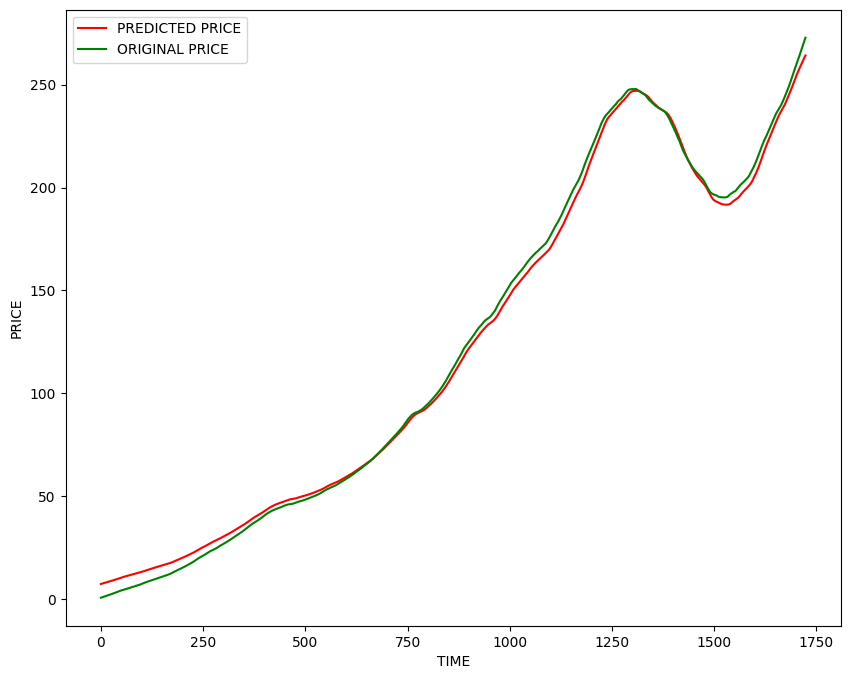

0.9980136727678469
14.626548484847417


In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='PREDICTED PRICE')
plt.plot(y,'g',label='ORIGINAL PRICE')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()


from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error as mse
r2 = r2s(y, y_predict)
mean_error = mse(y, y_predict)

print(r2)
print(mean_error)

In [29]:
model.save('Stock Predictions Model longterm.keras')